In [1]:
# Step 1: Import the necessary packages
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt

In [3]:
# step 2: Load the training and testing data
# Load CIFAR-10 dataset, which has 10 classes of images (e.g., airplane, car, bird, etc.)

(x_train, y_train),(x_test, y_test) = cifar10.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 621s 4us/step


In [11]:
# Step 3: Define the Network Architechture using keras
# This is a simple feedforward network (MLP) for image classification

model = Sequential([
    Flatten(input_shape=(32,32,3)),
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [13]:
# Compile the model with an optimizer (choose either SGD or Adam)
# For this example, we'll use the Adam optimizer for better convergence
model.compile(optimizer=Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [19]:
# Step 4: Train the Model using the chosen optimizer
# Train the model for 20 epochs and batch size of 32
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test), batch_size=32)

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 23ms/step - accuracy: 0.2793 - loss: 1.9793 - val_accuracy: 0.3548 - val_loss: 1.7658
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.3903 - loss: 1.6925 - val_accuracy: 0.4146 - val_loss: 1.6160
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4290 - loss: 1.5895 - val_accuracy: 0.4284 - val_loss: 1.5982
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4484 - loss: 1.5423 - val_accuracy: 0.4464 - val_loss: 1.5504
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4664 - loss: 1.4862 - val_accuracy: 0.4553 - val_loss: 1.5345
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4765 - loss: 1.4654 - val_accuracy: 0.4732 - val_loss: 1.4789
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 22ms/step - accuracy: 0.4875 - loss: 1.4317 - val_accuracy: 0.4424 - val_loss: 1.5651
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 34s 21ms/step - accuracy: 0.4927 -

In [21]:
# step 5: Evaluate the Network
# evaluate the models performance on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4997 - loss: 1.4761
Test Loss: 1.4822, Test Accuracy: 0.4964


In [23]:
# Step 6: Plot the training Loss and Accuracy
# Retrieve loss and accuracy values from the history object for plotting
epochs = range(1, 21)
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

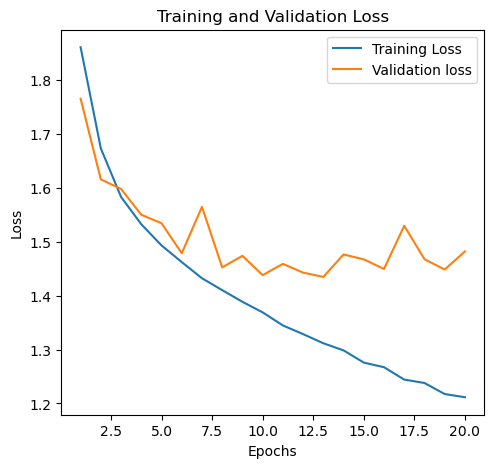

In [25]:
# Plotting training and validation loss
plt.figure(figsize=(12, 5))

plt.subplot(1,2,1)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

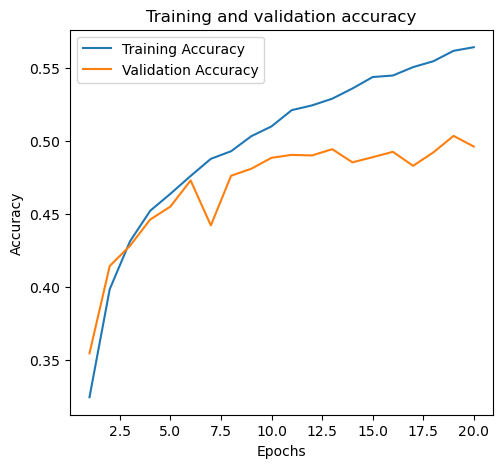

In [31]:
# Plotting training and validation accuracy
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 2)
plt.plot(epochs, train_accuracy, label='Training Accuracy')
plt.plot(epochs, val_accuracy, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
